In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.__version__

'2.4.1'

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train.shape

(50000, 1)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
y_train[1][0]

9

In [11]:
classes[y_train[1][0]]

'truck'

In [12]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

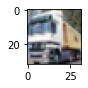

In [13]:
plot_sample(1)

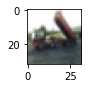

In [14]:
plot_sample(2)

In [15]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
y_train_categorical = keras.utils.to_categorical(
    y_train,
    num_classes=10,
    dtype='float32'
)
y_train_categorical = keras.utils.to_categorical(
    y_train,
    num_classes=10,
    dtype='float32'
)

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics='accuracy'
)
model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 32s 21ms/step - loss: 1.9373 - accuracy: 0.3036


In [21]:
np.argmax(model.predict(x_test_scaled)[0])

2

In [22]:
y_predicted = model.predict(x_test_scaled)

In [23]:
y_indices = [np.argmax(i) for i in y_predicted]

In [24]:
classes[y_indices[4]]

'deer'

In [25]:
classes[y_test[4][0]]

'frog'

In [26]:
def get_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')

    ])
    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy',
        metrics='accuracy'
    )
    return model

In [32]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model()
    model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 33s 21ms/step - loss: 1.9288 - accuracy: 0.3089
33.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
